In [1]:
import sys
import os
print(sys.executable)
sys.path.append(os.path.dirname(os.getcwd()))

c:\Users\geer\AppData\Local\miniforge3\envs\svk\python.exe


In [2]:
def draw_chevron_with_polygon(dwg,x,y,width,height,id:str,arrow_depth=20,stroke_color="blue",fill_color="blue", stroke_width=0.5, add_to_dwg=True):

    gradient_size=30
    x_scale=width / gradient_size
    fill_name = f"gradient_{id}"

    radial_grad = dwg.radialGradient(
    center=((x+20)/x_scale, y),  # center in relative coords
    r=gradient_size,              # radius relative to box
    gradientUnits="userSpaceOnUse",
    id=fill_name
    )
    radial_grad.add_stop_color(0, fill_color)   # center
    radial_grad.add_stop_color(1, "white")      # edge

    radial_grad['gradientTransform'] = f"scale({x_scale},1)"

    dwg.defs.add(radial_grad)

    points = [
        (x,y),
        (x + width - arrow_depth, y),
        (x + width, y + height / 2),
        (x + width - arrow_depth, y + height),
        (x,y + height),
        (x + arrow_depth,y + height/2),
    ]
    polygon = dwg.polygon(points=points, stroke=stroke_color, fill=f"url(#{fill_name})", stroke_width=stroke_width, id=id)
    
    if add_to_dwg:
        dwg.add(polygon)
        
    return polygon

In [3]:
def add_gradients(dwg):
    radial_grad = dwg.radialGradient(
    center=(100, 50),  # center in relative coords
    r=80,              # radius relative to box
    gradientUnits="userSpaceOnUse",
    id="grad2"
    )
    radial_grad.add_stop_color(0, "blue")   # center
    radial_grad.add_stop_color(1, "white")      # edge

    radial_grad['gradientTransform'] = "scale(4,1)"

    dwg.defs.add(radial_grad)


    linear_gradient = dwg.linearGradient(
        start=(0, 0),  # top-left
        end=(0.5, 1),    # bottom-left (vertical gradient)
        id="grad1"
    )
    linear_gradient.add_stop_color(0, "blue")  # start color
    linear_gradient.add_stop_color(0.5, "white")  # start color
    linear_gradient.add_stop_color(1, "white")       # end color
    dwg.defs.add(linear_gradient)                   # add gradient definition


In [ ]:
from svk.visualization.helpers import measure_text
import svgwrite

dwg = svgwrite.Drawing("slide.svg", size=("800px", "600px"))

add_gradients(dwg)

pol = draw_chevron_with_polygon(dwg,150,350,300,100, "first_try", arrow_depth=20, fill_color="blue", add_to_dwg=False)
pol2 = draw_chevron_with_polygon(dwg,150,10,300,250, "second_try", arrow_depth=20, fill_color="darkorange", stroke_color="darkorange")

w,h = measure_text("Header", 14)

link = dwg.a(href=f"#{pol2.attribs.get("id")}", target="_self")
txt = dwg.text(
    "Header", 
    insert=(170, 20), 
    fill="black", 
    font_size=14,
    font_weight="bold",
    dominant_baseline="text-before-edge"
    )

link.add(txt)
dwg.add(pol)
dwg.add(link)

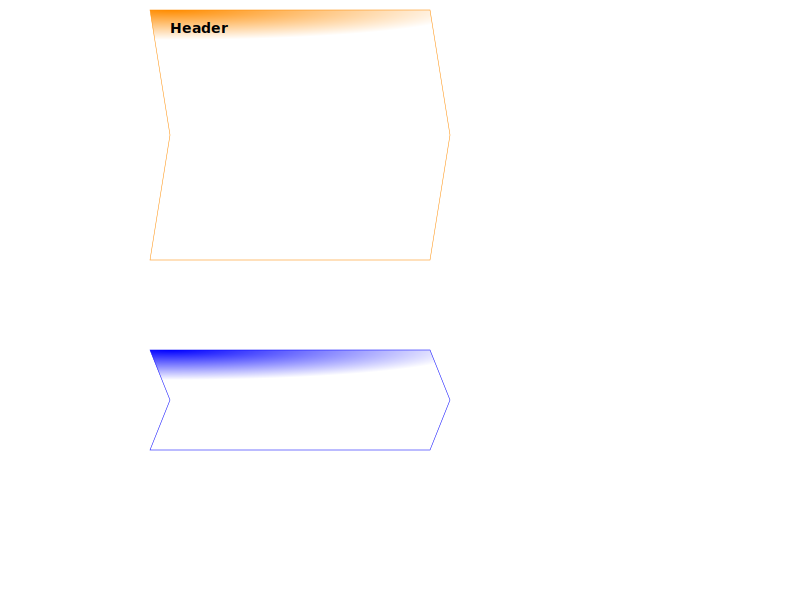

'<svg baseProfile="full" height="600px" version="1.1" width="800px" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs><radialGradient cx="100" cy="50" gradientTransform="scale(4,1)" gradientUnits="userSpaceOnUse" id="grad2" r="80"><stop offset="0" stop-color="blue" /><stop offset="1" stop-color="white" /></radialGradient><linearGradient id="grad1" x1="0" x2="0.5" y1="0" y2="1"><stop offset="0" stop-color="blue" /><stop offset="0.5" stop-color="white" /><stop offset="1" stop-color="white" /></linearGradient><radialGradient cx="17.0" cy="350" gradientTransform="scale(10.0,1)" gradientUnits="userSpaceOnUse" id="gradient_first_try" r="30"><stop offset="0" stop-color="blue" /><stop offset="1" stop-color="white" /></radialGradient><radialGradient cx="17.0" cy="10" gradientTransform="scale(10.0,1)" gradientUnits="userSpaceOnUse" id="gradient_second_try" r="30"><stop offset="0" stop-color="darkorange" /><stop offset

In [ ]:
from IPython.display import SVG

display(SVG(dwg.tostring()))

In [6]:
from playwright.sync_api import sync_playwright

def svg_to_pdf(svg_dwg, pdf_path):
    """
    Save an svgwrite.Drawing object to PDF with all effects and links preserved.
    
    Parameters:
    -----------
    svg_dwg : svgwrite.Drawing
        The svgwrite SVG object to export.
    pdf_path : str
        Path to the output PDF file.
    """
    # Convert SVG to string
    svg_content = svg_dwg.tostring()

    # Wrap the SVG in minimal HTML
    html = f"""
    <html>
      <body style="margin:0; padding:0;">
        {svg_content}
      </body>
    </html>
    """

    with sync_playwright() as p:
        browser = p.chromium.launch()  # headless by default
        page = browser.new_page()

        page.set_content(html)

        # Save PDF, using the SVG's width/height if set
        width = svg_dwg.width if hasattr(svg_dwg, "width") else "800px"
        height = svg_dwg.height if hasattr(svg_dwg, "height") else "600px"

        page.pdf(
            path=pdf_path,
            width=width,
            height=height,
            print_background=True
        )

        browser.close()

In [7]:
# svg_to_pdf(dwg, "c:/test/test.pdf")
